# Summary Showdown

breakdown the showdown results.

In [5]:
import polars as pl
import seaborn as sns
import joblib
import os


In [6]:
PATH_RESULTS = '../output2/'

## Get Data

In [73]:
all_pkgs = ['pandas','polars','vaex','dask']
all_n1 = ['0','1','5','10','25','50']
all_n2 = ['0', '1', '5', '10', '25', '50', '75', '100', '130', '175']
all_n3 = ['25', '50', '75', '100', '130', '175']

In [63]:
run_sla = {}
run_mem = {}

for pkg in all_pkgs:
    fn = pkg+'-sla.pkl'
    run_sla[pkg] = joblib.load(os.path.join(PATH_RESULTS,fn))
    fn = pkg+'-mem.pkl'
    run_mem[pkg] = joblib.load(os.path.join(PATH_RESULTS,fn))


## Task1

In [64]:
task1_csv = pl.DataFrame([run_sla[pkg]['task1']['csv'] for pkg in all_pkgs])
task1_csv = task1_csv.with_columns(pl.Series(name="pkgs", values=all_pkgs))
task1_csv = task1_csv.melt(id_vars='pkgs',value_vars=all_n1,
                        variable_name='n_rows',value_name='sla_in_seconds')

task1_prq = pl.DataFrame([run_sla[pkg]['task1']['prq'] for pkg in all_pkgs])
task1_prq = task1_prq.with_columns(pl.Series(name="pkgs", values=all_pkgs))
task1_prq = task1_prq.melt(id_vars='pkgs',value_vars=all_n2,
                        variable_name='n_rows',value_name='sla_in_seconds')


<AxesSubplot: xlabel='n_rows', ylabel='sla_in_seconds'>

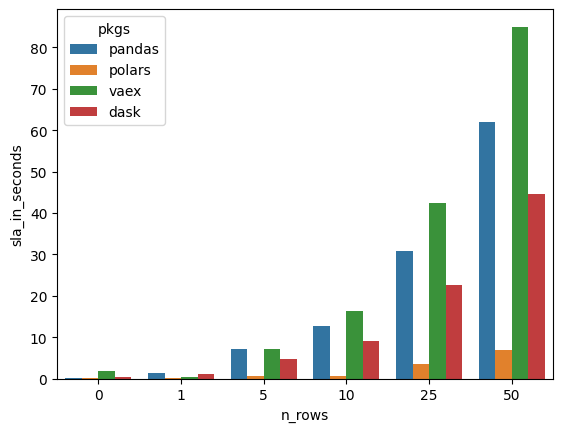

In [65]:
sns.barplot(data=task1_csv.to_pandas(), x= 'n_rows', y='sla_in_seconds',hue='pkgs')

<AxesSubplot: xlabel='n_rows', ylabel='sla_in_seconds'>

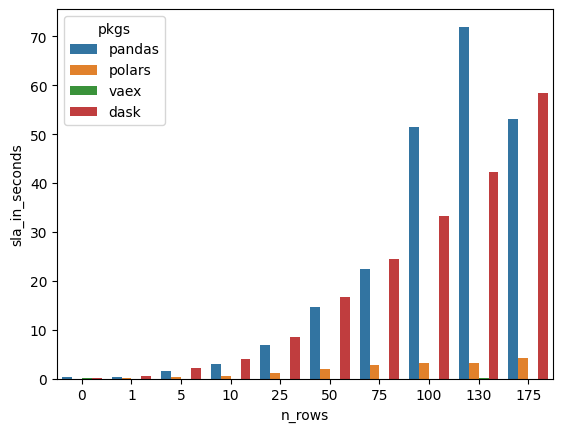

In [66]:
sns.barplot(data=task1_prq.to_pandas(), x= 'n_rows', y='sla_in_seconds',hue='pkgs')

## Task2

In [67]:
task2_csv = pl.DataFrame([run_sla[pkg]['task2']['csv'] for pkg in all_pkgs])
task2_csv = task2_csv.with_columns(pl.Series(name="pkgs", values=all_pkgs))
task2_csv = task2_csv.melt(id_vars='pkgs',value_vars=all_n1,
                        variable_name='n_rows',value_name='sla_in_seconds')

task2_prq = pl.DataFrame([run_sla[pkg]['task2']['prq'] for pkg in all_pkgs])
task2_prq = task2_prq.with_columns(pl.Series(name="pkgs", values=all_pkgs))
task2_prq = task2_prq.melt(id_vars='pkgs',value_vars=all_n2,
                        variable_name='n_rows',value_name='sla_in_seconds')


<AxesSubplot: xlabel='n_rows', ylabel='sla_in_seconds'>

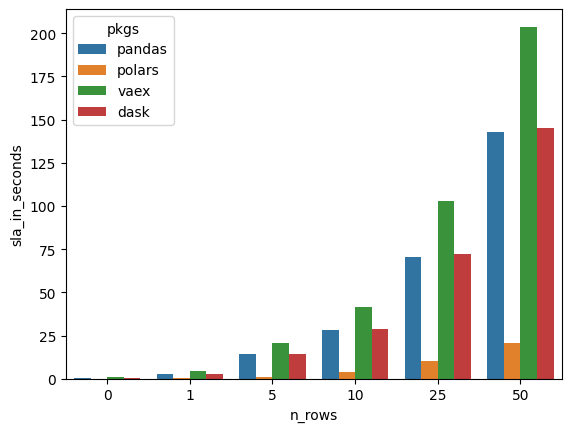

In [68]:
sns.barplot(data=task2_csv.to_pandas(), x= 'n_rows', y='sla_in_seconds',hue='pkgs')

<AxesSubplot: xlabel='n_rows', ylabel='sla_in_seconds'>

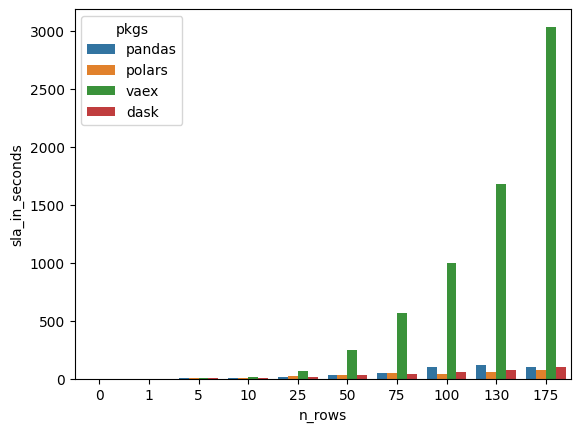

In [69]:
sns.barplot(data=task2_prq.to_pandas(), x= 'n_rows', y='sla_in_seconds',hue='pkgs')

## Task3

In [86]:
task_name = 'task7'

taskG = pl.DataFrame([run_sla[pkg][task_name] for pkg in all_pkgs])
taskG = taskG.with_columns(pl.Series(name="pkgs", values=all_pkgs))
taskG = taskG.melt(id_vars='pkgs',value_vars=all_n3,
                        variable_name='n_rows',value_name='sla_in_seconds')


<AxesSubplot: xlabel='n_rows', ylabel='sla_in_seconds'>

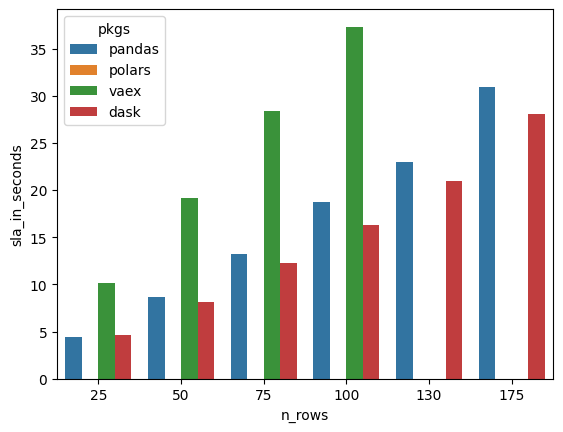

In [87]:
sns.barplot(data=taskG.to_pandas(), x= 'n_rows', y='sla_in_seconds',hue='pkgs')

In [88]:
taskG

pkgs,n_rows,sla_in_seconds
str,str,f64
"""pandas""","""25""",4.422211
"""polars""","""25""",null
"""vaex""","""25""",10.186374
"""dask""","""25""",4.585813
"""pandas""","""50""",8.711333
"""polars""","""50""",null
"""vaex""","""50""",19.186478
"""dask""","""50""",8.126587
"""pandas""","""75""",13.207926
